# Skyrme equation of state example for O$_2$sclpy

See the O$_2$sclpy documentation at https://neutronstars.utk.edu/code/o2sclpy for more information.

In [1]:
import o2sclpy
import matplotlib.pyplot as plot
import ctypes
import numpy
import sys

plots=True
if 'pytest' in sys.modules:
    plots=False

Link the O$_2$scl library:

In [2]:
link=o2sclpy.linker()
link.link_o2scl()

Get the value of $\hbar c$ from an O$_2$scl find_constants object:

In [3]:
fc=o2sclpy.find_constants(link)
hc=fc.find_unique('hbarc','MeV*fm')
print('hbarc = %7.6e' % (hc))

hbarc = 1.973270e+02


Get a copy (a pointer to) the O$_2$scl unit conversion object:

In [4]:
cu=link.o2scl_settings.get_convert_units()

Create neutron and proton objects and set their spin degeneracy and
masses. The O$_2$scl EOS classes expect these masses to be in units
of inverse femtometers.

In [5]:
neut=o2sclpy.fermion(link)
neut.g=2.0
neut.m=cu.convert('g','1/fm',fc.find_unique('massneutron','g'))

In [6]:
prot=o2sclpy.fermion(link)
prot.g=2.0
prot.m=cu.convert('g','1/fm',fc.find_unique('massproton','g'))

Create the Skyrme EOS object and load the NRAPR parameterization:

In [7]:
sk=o2sclpy.eos_had_skyrme(link)
o2sclpy.skyrme_load(link,sk,'NRAPR',False,0)

Compute nuclear saturation and output the saturation density
and binding energy:

In [8]:
sk.saturation()
print('NRAPR: n0=%7.6e 1/fm^3, E/A=%7.6e MeV' % (sk.n0,sk.eoa*hc))
print('')

NRAPR: n0=1.605785e-01 1/fm^3, E/A=-1.585619e+01 MeV



Create the nstar_cold object for automatically computing the
beta-equilibrium EOS and solving the TOV equations:

In [9]:
nc=o2sclpy.nstar_cold(link)

Let the nstar_cold object know we want to use the Skyrme NRAPR EOS:

In [10]:
nc.set_eos(sk)

Compute the EOS

In [11]:
ret1=nc.calc_eos(0.01)

Summarize the columns in the EOS table and their associated units.
The strings returned by the C++ wrappers are bytes objects, so we
need to convert them to strings to print them out.

In [12]:
eos_table=nc.get_eos_results()
print('EOS table:')
for i in range(0,eos_table.get_ncolumns()):
    col=eos_table.get_column_name(i)
    unit=eos_table.get_unit(col)
    print('Column',i,str(col,'UTF-8'),str(unit,'UTF-8'))
print('')

EOS table:
Column 0 ed 1/fm^4
Column 1 pr 1/fm^4
Column 2 nb 1/fm^3
Column 3 mun 1/fm
Column 4 mup 1/fm
Column 5 mue 1/fm
Column 6 nn 1/fm^3
Column 7 np 1/fm^3
Column 8 ne 1/fm^3
Column 9 kfn 1/fm
Column 10 kfp 1/fm
Column 11 kfe 1/fm
Column 12 mumu 1/fm
Column 13 nmu 1/fm^3
Column 14 kfmu 1/fm
Column 15 cs2 
Column 16 logp 
Column 17 loge 
Column 18 s 1/fm
Column 19 urca 1/fm^4
Column 20 ad_index 



Get the columns of the table as numpy arrays, and then plot the EOS.
The first line requires a bit of explanation. The raw vectors stored
in O$_2$scl table objects are often larger than the current table
size so it can grow efficiently. Thus we truncate the vector so that
it matches the current table size.

<class 'numpy.ndarray'>


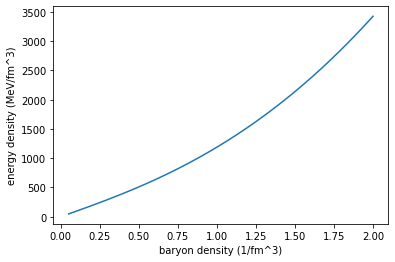

In [13]:
nb=eos_table['nb'][0:eos_table.get_nlines()]
print(type(nb))
ed=eos_table['ed'][0:eos_table.get_nlines()]
edhc=[ed[i]*hc for i in range(0,eos_table.get_nlines())]
plot.plot(nb,edhc)
plot.xlabel('baryon density (1/fm^3)')
plot.ylabel('energy density (MeV/fm^3)')
if plots:
    plot.show()

Compute the M-R curve using the TOV equations. TOV solver
automatically outputs some information to std::cout, and we use the
cap_cout class to ensure that output goes here instead of the
jupyter console.

In [14]:
cc=o2sclpy.cap_cout()
cc.open()
ret2=nc.calc_nstar()
cc.close()

Contents of std::cout:
Mass versus radius mode.
Central P: 7.0000e-07 (Msun/km^3), M: 1.1198e-01 (Msun), R: 4.9512e+01 (km)
Central P: 7.7000e-07 (Msun/km^3), M: 1.1729e-01 (Msun), R: 4.1344e+01 (km)
Central P: 8.4700e-07 (Msun/km^3), M: 1.2314e-01 (Msun), R: 3.5633e+01 (km)
Central P: 9.3170e-07 (Msun/km^3), M: 1.2957e-01 (Msun), R: 3.1426e+01 (km)
Central P: 1.0249e-06 (Msun/km^3), M: 1.3652e-01 (Msun), R: 2.8239e+01 (km)
Central P: 1.1274e-06 (Msun/km^3), M: 1.4406e-01 (Msun), R: 2.5740e+01 (km)
Central P: 1.2401e-06 (Msun/km^3), M: 1.5217e-01 (Msun), R: 2.3747e+01 (km)
Central P: 1.3641e-06 (Msun/km^3), M: 1.6087e-01 (Msun), R: 2.2129e+01 (km)
Central P: 1.5005e-06 (Msun/km^3), M: 1.7016e-01 (Msun), R: 2.0796e+01 (km)
Central P: 1.6506e-06 (Msun/km^3), M: 1.8006e-01 (Msun), R: 1.9684e+01 (km)
Central P: 1.8156e-06 (Msun/km^3), M: 1.9060e-01 (Msun), R: 1.8746e+01 (km)
Central P: 1.9972e-06 (Msun/km^3), M: 2.0182e-01 (Msun), R: 1.7947e+01 (km)
Central P: 2.1969e-06 (Msun/km^3), M: 2.

Get the table for the TOV results

In [15]:
tov_table=nc.get_tov_results()

Summarize the columns in the TOV table and their associated units.

In [16]:
print('TOV table:')
for i in range(0,tov_table.get_ncolumns()):
    col=tov_table.get_column_name(i)
    unit=tov_table.get_unit(col)
    print('Column',i,str(col,'UTF-8'),str(unit,'UTF-8'))
print('')

TOV table:
Column 0 gm Msun
Column 1 r km
Column 2 bm Msun
Column 3 pr 1/fm^4
Column 4 ed 1/fm^4
Column 5 nb 1/fm^3
Column 6 sg 1/km
Column 7 rs 
Column 8 dmdr Msun/km
Column 9 dlogpdr 1/km
Column 10 dbmdr Msun/km



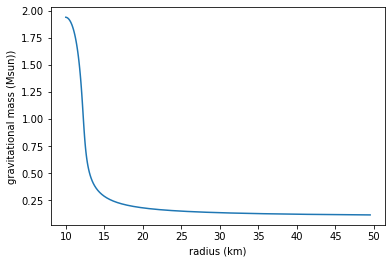

In [17]:
plot.plot(tov_table['r'][0:tov_table.get_nlines()],
          tov_table['gm'][0:tov_table.get_nlines()])
plot.xlabel('radius (km)')
plot.ylabel('gravitational mass (Msun))')
if plots:
    plot.show()

This line computes the profile of a 1.4 solar mass 
neutron star. If you look at the console output you will
notice that the maximum mass is computed first. This
helps ensure the class doesn't give the profile of an
unstable configuration.

In [18]:
ret2=nc.fixed(1.4)

1.400000e+00 solar mass mode.
Maximum mass mode.
Central P: 7.0000e-05 (Msun/km^3), M: 1.3444e+00 (Msun), R: 1.1935e+01 (km)
Central P: 9.1000e-05 (Msun/km^3), M: 1.4623e+00 (Msun), R: 1.1788e+01 (km)
Central P: 1.1830e-04 (Msun/km^3), M: 1.5723e+00 (Msun), R: 1.1619e+01 (km)
Central P: 1.5379e-04 (Msun/km^3), M: 1.6714e+00 (Msun), R: 1.1425e+01 (km)
Central P: 1.9993e-04 (Msun/km^3), M: 1.7567e+00 (Msun), R: 1.1208e+01 (km)
Central P: 2.5991e-04 (Msun/km^3), M: 1.8263e+00 (Msun), R: 1.0968e+01 (km)
Central P: 3.3788e-04 (Msun/km^3), M: 1.8791e+00 (Msun), R: 1.0710e+01 (km)
Central P: 4.3924e-04 (Msun/km^3), M: 1.9149e+00 (Msun), R: 1.0437e+01 (km)
Central P: 5.7101e-04 (Msun/km^3), M: 1.9340e+00 (Msun), R: 1.0154e+01 (km)
Central P: 7.4231e-04 (Msun/km^3), M: 1.9379e+00 (Msun), R: 9.8650e+00 (km)
Central P: 9.6501e-04 (Msun/km^3), M: 1.9282e+00 (Msun), R: 9.5751e+00 (km)
Central P: 1.2545e-03 (Msun/km^3), M: 1.9069e+00 (Msun), R: 9.2890e+00 (km)
Central P: 1.6309e-03 (Msun/km^3), M: 1

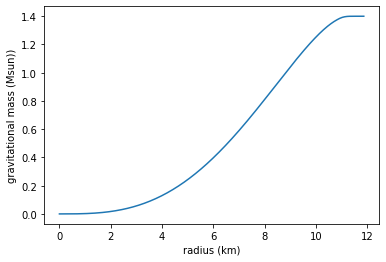

In [19]:
plot.plot(tov_table['r'][0:tov_table.get_nlines()],
          tov_table['gm'][0:tov_table.get_nlines()])
plot.xlabel('radius (km)')
plot.ylabel('gravitational mass (Msun))')
if plots:
    plot.show()

Create a O$_2$scl ``tov_love`` object to compute the tidal
deformability of a 1.4 solar mass neutron star.

In [20]:
tl=o2sclpy.tov_love(link)

The ``tov_love`` class requires the energy density and pressure to
be in units of $ \mathrm{M}_{\odot}/\mathrm{km}^3 $, so we convert
those columns in the table

In [21]:
tov_table.convert_to_unit('ed','Msun/km^3',True)
tov_table.convert_to_unit('pr','Msun/km^3',True)

0

The ``tov_love`` class also requires the speed of sound, so we
compute it using interpolation.

In [22]:
tov_table.deriv_col('ed','pr','cs2')

Provide the TOV table to the ``tov_love`` object and compute the
tidal deformability in units of $\mathrm{km}^{-5}$:

In [23]:
tl.set_tab(tov_table)
(ret,yR,beta,k2,lambda_km5,lambda_cgs)=tl.calc_y(False)

print('%7.6e' % lambda_km5)

1.118582e+04


To get the dimensionless tidal deformability we divide by $(G M)^5$:

In [24]:
twoG=fc.find_unique('schwarz','m')/1.0e3
Lambda=lambda_km5/(1.4*twoG/2.0)**5
print('%7.6e' % Lambda)

2.962623e+02


For testing using ``pytest``:

In [25]:
def test_fun():
    assert numpy.allclose(Lambda,296.26,rtol=1.0e-3)
    return